# This Jupyter notebook is meant to play around with the IRS data.

In [413]:
# Import packages

import pandas as pd
import numpy as np

In [414]:
# Older IRS data was stored on a .xls file. We use xlrd so that pandas can read.
!pip install xlrd

Comment: pandas is struggling to read the xls file. One should open up the xls file and see that is making it so ugly. There are probably a bunch of excel cells which is just describing the data. We also need to get the NYC Zip Codes we care about. This has already been saved to an NYC_zipcodes.csv file by extracing zip codes from rat inspection and rat sightings data.

In [415]:
irs22 = pd.read_excel("scr/data/irs_zip/2022_irs_NY_zip.xlsx")
irs22 = irs22.iloc[2:]
irs22.columns = irs22.iloc[0]
irs22 = irs22.iloc[12:]


In [416]:
display(irs22.head(4))

2,ZIP\ncode [1],Size of adjusted gross income,Number of returns [2],Number of single returns,Number of joint returns,Number of head of household returns,Number of electronically filed returns,Number of computer prepared paper returns,Number with paid preparer's signature,Number of returns with direct deposit,...,Net investment income tax,NaN,Tax due at time of filing [15],NaN,Total overpayments,NaN,Overpayments refunded [16],NaN,Credited to next year's estimated tax,NaN
14,10001,"$1 under $25,000",3170,2460,250,360,2890,140,1810,1750,...,0,0,640,663,2010,4844,1970,4017,50,199
15,10001,"$25,000 under $50,000",2110,1560,200,280,1990,40,1120,1430,...,0,0,450,919,1620,4479,1570,4134,60,345
16,10001,"$50,000 under $75,000",1920,1510,150,190,1820,40,1030,1200,...,0,0,560,1385,1350,3880,1300,3450,70,430
17,10001,"$75,000 under $100,000",1580,1250,170,110,1510,30,810,860,...,0,0,600,1556,970,2864,930,2482,60,381


In [417]:
# Extract columns corresponding to Zip code, AGI, etc. Note that some of the columns are incorrectly named!! Compare
# The data frame below with what the excel file actually shows!
irs22 = irs22.iloc[:,[0,1,2,18,19,20,21,22]]

In [418]:
irs22.head(30)

2,ZIP\ncode [1],Size of adjusted gross income,Number of returns [2],Adjusted gross income (AGI) [7],Total income,NaN,Salaries and wages in AGI,NaN
14,10001,"$1 under $25,000",3170,35386,3170,36407,1840,26668
15,10001,"$25,000 under $50,000",2110,78726,2110,80304,1740,62122
16,10001,"$50,000 under $75,000",1920,119460,1920,121395,1680,98641
17,10001,"$75,000 under $100,000",1580,137176,1580,138273,1400,113945
18,10001,"$100,000 under $200,000",3680,529510,3680,534415,3330,446179
19,10001,"$200,000 or more",4500,3579607,4500,3615561,4170,2229438
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,10002,NaN,39620,3197596,39620,3231089,32760,2532420
22,10002,"$1 under $25,000",15010,177309,15010,180248,10240,137752
23,10002,"$25,000 under $50,000",7870,283521,7870,287743,7090,241808


In [419]:
# To - Do for whoever's job it is: Please clean this data!

irs22 = irs22.loc[irs22['Total income'] != np.nan]

In [420]:
irs22.head(30)

2,ZIP\ncode [1],Size of adjusted gross income,Number of returns [2],Adjusted gross income (AGI) [7],Total income,NaN,Salaries and wages in AGI,NaN
14,10001,"$1 under $25,000",3170,35386,3170,36407,1840,26668
15,10001,"$25,000 under $50,000",2110,78726,2110,80304,1740,62122
16,10001,"$50,000 under $75,000",1920,119460,1920,121395,1680,98641
17,10001,"$75,000 under $100,000",1580,137176,1580,138273,1400,113945
18,10001,"$100,000 under $200,000",3680,529510,3680,534415,3330,446179
19,10001,"$200,000 or more",4500,3579607,4500,3615561,4170,2229438
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,10002,NaN,39620,3197596,39620,3231089,32760,2532420
22,10002,"$1 under $25,000",15010,177309,15010,180248,10240,137752
23,10002,"$25,000 under $50,000",7870,283521,7870,287743,7090,241808


In [421]:
irs22.info()

<class 'pandas.DataFrame'>
RangeIndex: 12308 entries, 14 to 12321
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ZIP
code [1]                     10773 non-null  object
 1   Size of adjusted gross income    9216 non-null   str   
 2   Number of returns [2]            10751 non-null  object
 3   Adjusted gross income (AGI) [7]  10751 non-null  object
 4   Total income                     10751 non-null  object
 5   nan                              10751 non-null  object
 6   Salaries and wages in AGI        10751 non-null  object
 7   nan                              10751 non-null  object
dtypes: object(7), str(1)
memory usage: 949.4+ KB


In [422]:
irs22.dropna(axis=0)

2,ZIP\ncode [1],Size of adjusted gross income,Number of returns [2],Adjusted gross income (AGI) [7],Total income,NaN,Salaries and wages in AGI,NaN
14,10001,"$1 under $25,000",3170,35386,3170,36407,1840,26668
15,10001,"$25,000 under $50,000",2110,78726,2110,80304,1740,62122
16,10001,"$50,000 under $75,000",1920,119460,1920,121395,1680,98641
17,10001,"$75,000 under $100,000",1580,137176,1580,138273,1400,113945
18,10001,"$100,000 under $200,000",3680,529510,3680,534415,3330,446179
...,...,...,...,...,...,...,...,...
12295,99999,"$25,000 under $50,000",15410,566215,15410,571154,12350,424400
12296,99999,"$50,000 under $75,000",10770,664620,10770,669490,8740,484273
12297,99999,"$75,000 under $100,000",7510,651621,7510,655525,5950,443893
12298,99999,"$100,000 under $200,000",13750,1918767,13750,1935730,11240,1337792


In [423]:
irs22.tail(5)

2,ZIP\ncode [1],Size of adjusted gross income,Number of returns [2],Adjusted gross income (AGI) [7],Total income,NaN,Salaries and wages in AGI,NaN
12317,NOTE: This table presents aggregates of all re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12318,This table is based on tax returns as initiall...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12319,For explanation of the tax law changes which c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12320,Detail may not add to totals because of rounding.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12321,"SOURCE: IRS, Statistics of Income Division, \n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [424]:
irs22.sample(10)

2,ZIP\ncode [1],Size of adjusted gross income,Number of returns [2],Adjusted gross income (AGI) [7],Total income,NaN,Salaries and wages in AGI,NaN
1275,10901,"$200,000 or more",1610,1070816,1610,1083181,1390,409279
11799,14814,"$25,000 under $50,000",160,5966,160,5966,130,4263
6425,12857,"$75,000 under $100,000",20,1840,20,1840,0,0
2024,11228,"$50,000 under $75,000",2490,153191,2490,154586,2190,125729
2410,11423,"$100,000 under $200,000",1770,234696,1770,235726,1600,192875
278,10037,"$1 under $25,000",2970,37186,2970,37979,1970,24811
1021,10578,NaN,440,49394,440,49888,340,32781
955,10553,"$200,000 or more",180,56091,180,56232,170,44780
10736,14481,"$50,000 under $75,000",150,9685,150,9731,120,6900
9263,13796,"$25,000 under $50,000",150,5633,150,5683,120,4248


In [425]:
irs22.head(10)

2,ZIP\ncode [1],Size of adjusted gross income,Number of returns [2],Adjusted gross income (AGI) [7],Total income,NaN,Salaries and wages in AGI,NaN
14,10001,"$1 under $25,000",3170,35386,3170,36407,1840,26668
15,10001,"$25,000 under $50,000",2110,78726,2110,80304,1740,62122
16,10001,"$50,000 under $75,000",1920,119460,1920,121395,1680,98641
17,10001,"$75,000 under $100,000",1580,137176,1580,138273,1400,113945
18,10001,"$100,000 under $200,000",3680,529510,3680,534415,3330,446179
19,10001,"$200,000 or more",4500,3579607,4500,3615561,4170,2229438
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,10002,NaN,39620,3197596,39620,3231089,32760,2532420
22,10002,"$1 under $25,000",15010,177309,15010,180248,10240,137752
23,10002,"$25,000 under $50,000",7870,283521,7870,287743,7090,241808


In [426]:
x = irs22.at[20,'Size of adjusted gross income']

In [427]:
irs22.at[20,'Size of adjusted gross income']

nan

In [428]:
irs22.dropna(axis=0)

2,ZIP\ncode [1],Size of adjusted gross income,Number of returns [2],Adjusted gross income (AGI) [7],Total income,NaN,Salaries and wages in AGI,NaN
14,10001,"$1 under $25,000",3170,35386,3170,36407,1840,26668
15,10001,"$25,000 under $50,000",2110,78726,2110,80304,1740,62122
16,10001,"$50,000 under $75,000",1920,119460,1920,121395,1680,98641
17,10001,"$75,000 under $100,000",1580,137176,1580,138273,1400,113945
18,10001,"$100,000 under $200,000",3680,529510,3680,534415,3330,446179
...,...,...,...,...,...,...,...,...
12295,99999,"$25,000 under $50,000",15410,566215,15410,571154,12350,424400
12296,99999,"$50,000 under $75,000",10770,664620,10770,669490,8740,484273
12297,99999,"$75,000 under $100,000",7510,651621,7510,655525,5950,443893
12298,99999,"$100,000 under $200,000",13750,1918767,13750,1935730,11240,1337792


In [429]:
irs22.head(10)

2,ZIP\ncode [1],Size of adjusted gross income,Number of returns [2],Adjusted gross income (AGI) [7],Total income,NaN,Salaries and wages in AGI,NaN
14,10001,"$1 under $25,000",3170,35386,3170,36407,1840,26668
15,10001,"$25,000 under $50,000",2110,78726,2110,80304,1740,62122
16,10001,"$50,000 under $75,000",1920,119460,1920,121395,1680,98641
17,10001,"$75,000 under $100,000",1580,137176,1580,138273,1400,113945
18,10001,"$100,000 under $200,000",3680,529510,3680,534415,3330,446179
19,10001,"$200,000 or more",4500,3579607,4500,3615561,4170,2229438
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,10002,NaN,39620,3197596,39620,3231089,32760,2532420
22,10002,"$1 under $25,000",15010,177309,15010,180248,10240,137752
23,10002,"$25,000 under $50,000",7870,283521,7870,287743,7090,241808


In [430]:
irs22.dropna(inplace = True)

In [431]:
data = np.genfromtxt('NYC_zipcodes.csv')


In [432]:
irs22 = irs22[irs22['ZIP\ncode [1]'].isin(data)]

In [433]:
irs22.info()

<class 'pandas.DataFrame'>
Index: 1086 entries, 14 to 2811
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ZIP
code [1]                     1086 non-null   object
 1   Size of adjusted gross income    1086 non-null   str   
 2   Number of returns [2]            1086 non-null   object
 3   Adjusted gross income (AGI) [7]  1086 non-null   object
 4   Total income                     1086 non-null   object
 5   nan                              1086 non-null   object
 6   Salaries and wages in AGI        1086 non-null   object
 7   nan                              1086 non-null   object
dtypes: object(7), str(1)
memory usage: 97.5+ KB


In [434]:
len(data)

232

In [435]:
irs22.head(10)

2,ZIP\ncode [1],Size of adjusted gross income,Number of returns [2],Adjusted gross income (AGI) [7],Total income,NaN,Salaries and wages in AGI,NaN
14,10001,"$1 under $25,000",3170,35386,3170,36407,1840,26668
15,10001,"$25,000 under $50,000",2110,78726,2110,80304,1740,62122
16,10001,"$50,000 under $75,000",1920,119460,1920,121395,1680,98641
17,10001,"$75,000 under $100,000",1580,137176,1580,138273,1400,113945
18,10001,"$100,000 under $200,000",3680,529510,3680,534415,3330,446179
19,10001,"$200,000 or more",4500,3579607,4500,3615561,4170,2229438
22,10002,"$1 under $25,000",15010,177309,15010,180248,10240,137752
23,10002,"$25,000 under $50,000",7870,283521,7870,287743,7090,241808
24,10002,"$50,000 under $75,000",5190,321146,5190,324537,4790,281050
25,10002,"$75,000 under $100,000",3350,289923,3350,292585,3060,248533


In [436]:
irs22.info()

<class 'pandas.DataFrame'>
Index: 1086 entries, 14 to 2811
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ZIP
code [1]                     1086 non-null   object
 1   Size of adjusted gross income    1086 non-null   str   
 2   Number of returns [2]            1086 non-null   object
 3   Adjusted gross income (AGI) [7]  1086 non-null   object
 4   Total income                     1086 non-null   object
 5   nan                              1086 non-null   object
 6   Salaries and wages in AGI        1086 non-null   object
 7   nan                              1086 non-null   object
dtypes: object(7), str(1)
memory usage: 97.5+ KB


In [437]:
irs22['Size of adjusted gross income'].value_counts()

Size of adjusted gross income
$1 under $25,000           181
$25,000 under $50,000      181
$50,000 under $75,000      181
$75,000 under $100,000     181
$100,000 under $200,000    181
$200,000 or more           181
Name: count, dtype: int64

In [438]:
irs22['ZIP\ncode [1]'] = irs22['ZIP\ncode [1]'].astype(int)

irs22['ZIP\ncode [1]']

print(10001 in irs22['ZIP\ncode [1]'].values)


True


In [439]:
# Weird Zip Codes

irs22['ZIP\ncode [1]'] = irs22['ZIP\ncode [1]'].astype(int)

data = data[:-1]
missingzips = []
for entry in data:
    entry = int(entry)
    if entry not in irs22['ZIP\ncode [1]'].values:
        print(entry)
        missingzips.append(entry)

len(missingzips)


0
458
1045
10000
10020
10041
10045
10055
10103
10105
10106
10110
10112
10115
10118
10119
10120
10121
10122
10123
10151
10152
10153
10154
10155
10158
10165
10167
10168
10169
10170
10171
10172
10173
10174
10176
10177
10178
10271
10278
10279
10281
11241
11242
11249
11251
11430
11695
11696
12345


50

In [440]:
print(data[2])

1045.0


In [441]:
irs22['ZIP\ncode [1]']

14      10001
15      10001
16      10001
17      10001
18      10001
        ...  
2807    11697
2808    11697
2809    11697
2810    11697
2811    11697
Name: ZIP\ncode [1], Length: 1086, dtype: int64

In [442]:
for entry in data:
    print(entry)
    entry = int(entry)

0.0
458.0
1045.0
10000.0
10001.0
10002.0
10003.0
10004.0
10005.0
10006.0
10007.0
10009.0
10010.0
10011.0
10012.0
10013.0
10014.0
10016.0
10017.0
10018.0
10019.0
10020.0
10021.0
10022.0
10023.0
10024.0
10025.0
10026.0
10027.0
10028.0
10029.0
10030.0
10031.0
10032.0
10033.0
10034.0
10035.0
10036.0
10037.0
10038.0
10039.0
10040.0
10041.0
10044.0
10045.0
10055.0
10065.0
10069.0
10075.0
10103.0
10105.0
10106.0
10110.0
10112.0
10115.0
10118.0
10119.0
10120.0
10121.0
10122.0
10123.0
10128.0
10151.0
10152.0
10153.0
10154.0
10155.0
10158.0
10162.0
10165.0
10167.0
10168.0
10169.0
10170.0
10171.0
10172.0
10173.0
10174.0
10176.0
10177.0
10178.0
10271.0
10278.0
10279.0
10280.0
10281.0
10282.0
10301.0
10302.0
10303.0
10304.0
10305.0
10306.0
10307.0
10308.0
10309.0
10310.0
10312.0
10314.0
10451.0
10452.0
10453.0
10454.0
10455.0
10456.0
10457.0
10458.0
10459.0
10460.0
10461.0
10462.0
10463.0
10464.0
10465.0
10466.0
10467.0
10468.0
10469.0
10470.0
10471.0
10472.0
10473.0
10474.0
10475.0
11001.0
11004.0

In [443]:
data =data[:-1]

In [444]:
data

array([    0.,   458.,  1045., 10000., 10001., 10002., 10003., 10004.,
       10005., 10006., 10007., 10009., 10010., 10011., 10012., 10013.,
       10014., 10016., 10017., 10018., 10019., 10020., 10021., 10022.,
       10023., 10024., 10025., 10026., 10027., 10028., 10029., 10030.,
       10031., 10032., 10033., 10034., 10035., 10036., 10037., 10038.,
       10039., 10040., 10041., 10044., 10045., 10055., 10065., 10069.,
       10075., 10103., 10105., 10106., 10110., 10112., 10115., 10118.,
       10119., 10120., 10121., 10122., 10123., 10128., 10151., 10152.,
       10153., 10154., 10155., 10158., 10162., 10165., 10167., 10168.,
       10169., 10170., 10171., 10172., 10173., 10174., 10176., 10177.,
       10178., 10271., 10278., 10279., 10280., 10281., 10282., 10301.,
       10302., 10303., 10304., 10305., 10306., 10307., 10308., 10309.,
       10310., 10312., 10314., 10451., 10452., 10453., 10454., 10455.,
       10456., 10457., 10458., 10459., 10460., 10461., 10462., 10463.,
      

In [445]:
irs22.head(1)

2,ZIP\ncode [1],Size of adjusted gross income,Number of returns [2],Adjusted gross income (AGI) [7],Total income,NaN,Salaries and wages in AGI,NaN
14,10001,"$1 under $25,000",3170,35386,3170,36407,1840,26668


In [446]:
irs22.rename(columns={'ZIP\ncode [1]': 'zip_code', 'Size of adjusted gross income': 'range_of_agi',
                      'Number of returns [2]': 'returns', 
                      'Adjusted gross income (AGI) [7]': 'agi',
                      'Total income': 'number_of_returns'
                      }, inplace=True)


In [447]:
irs22.head(2)

2,zip_code,range_of_agi,returns,agi,number_of_returns,NaN,Salaries and wages in AGI,NaN
14,10001,"$1 under $25,000",3170,35386,3170,36407,1840,26668
15,10001,"$25,000 under $50,000",2110,78726,2110,80304,1740,62122


In [448]:
irs22.drop(['number_of_returns'], axis=1)

2,zip_code,range_of_agi,returns,agi,NaN,Salaries and wages in AGI,NaN
14,10001,"$1 under $25,000",3170,35386,36407,1840,26668
15,10001,"$25,000 under $50,000",2110,78726,80304,1740,62122
16,10001,"$50,000 under $75,000",1920,119460,121395,1680,98641
17,10001,"$75,000 under $100,000",1580,137176,138273,1400,113945
18,10001,"$100,000 under $200,000",3680,529510,534415,3330,446179
...,...,...,...,...,...,...,...
2807,11697,"$25,000 under $50,000",290,10652,10764,190,5670
2808,11697,"$50,000 under $75,000",280,17430,17594,200,10687
2809,11697,"$75,000 under $100,000",290,25052,25119,190,13815
2810,11697,"$100,000 under $200,000",730,103310,103862,550,58423


In [449]:
df=irs22

In [450]:
df.columns = df.columns.fillna("new_column_name")

In [451]:
df.head(1)

2,zip_code,range_of_agi,returns,agi,number_of_returns,new_column_name,Salaries and wages in AGI,new_column_name
14,10001,"$1 under $25,000",3170,35386,3170,36407,1840,26668


In [452]:
df.rename(columns={
    df.columns[5]: "total_income",
    df.columns[7]: "salaries_and_wages_in_agi",
}, inplace=True)

In [453]:
df.index = df.index.factorize()[0] + 1

In [454]:
df.head(3)

2,zip_code,range_of_agi,returns,agi,number_of_returns,salaries_and_wages_in_agi,Salaries and wages in AGI,salaries_and_wages_in_agi
1,10001,"$1 under $25,000",3170,35386,3170,36407,1840,26668
2,10001,"$25,000 under $50,000",2110,78726,2110,80304,1740,62122
3,10001,"$50,000 under $75,000",1920,119460,1920,121395,1680,98641


In [455]:
df.columns=['zip_code','range_of_agi','returns', 'agi', 'number_of_returns', 'total_income', 'blah', 'salaries_and_wages_in_agi']

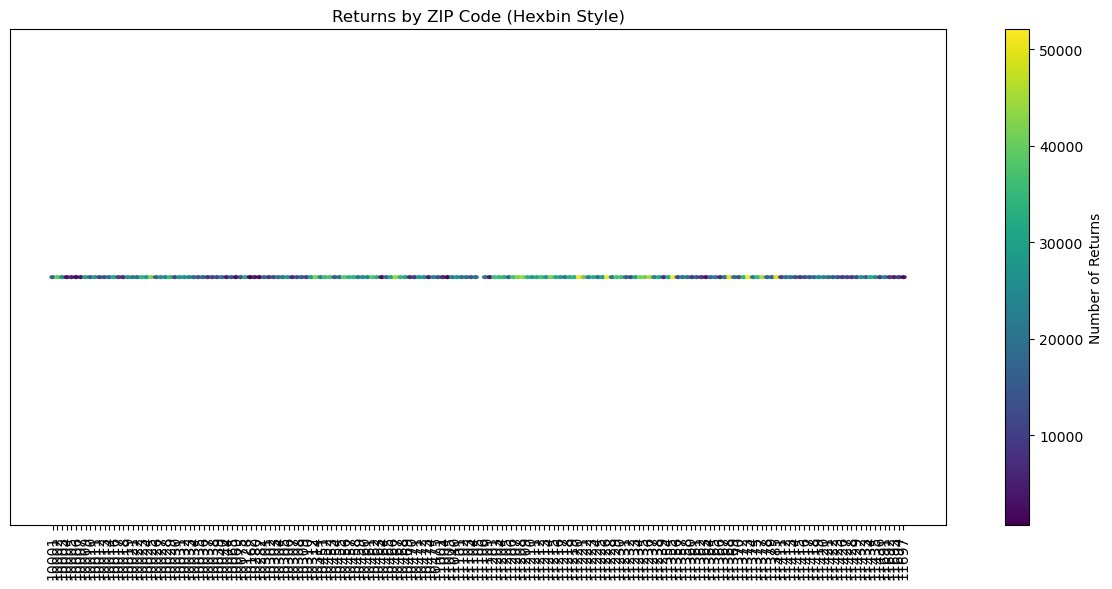

In [456]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Aggregate returns per ZIP ---
zip_totals = df.groupby('zip_code', as_index=False)['number_of_returns'].sum()
zip_totals = zip_totals.sort_values('zip_code').reset_index(drop=True)

# --- Map ZIP codes to integers ---
zip_totals['zip_idx'] = np.arange(len(zip_totals))

# --- Hexbin-style plot along x-axis ---
plt.figure(figsize=(12, 6))
hb = plt.hexbin(
    zip_totals['zip_idx'],          # x-axis: integer ZIP index
    np.zeros(len(zip_totals)),      # y-axis: single row
    C=zip_totals['number_of_returns'],
    gridsize=len(zip_totals),       # one hex per ZIP
    reduce_C_function=sum,
    cmap='viridis'
)

plt.colorbar(hb, label='Number of Returns')
plt.xticks(zip_totals['zip_idx'], zip_totals['zip_code'], rotation=90)
plt.yticks([])  # hide y-axis
plt.title('Returns by ZIP Code (Hexbin Style)')
plt.tight_layout()
plt.show()

In [457]:
pip install zipcodes


Note: you may need to restart the kernel to use updated packages.


In [458]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [459]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [460]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipcodes  

# --- 1) Aggregate returns per ZIP ---
zip_totals = df.groupby('zip_code', as_index=False)['number_of_returns'].sum()

# --- 2) Lookup lat/lng for each ZIP ---
# This will attach lat/long from the built-in zipcodes dataset
def lookup_coords(zip_code):
    info = zipcodes.matching(zip_code)
    if info:
        return float(info[0]['lat']), float(info[0]['long'])
    return None, None

coords = zip_totals['zip_code'].apply(lookup_coords)
zip_totals['lat'] = coords.apply(lambda x: x[0])
zip_totals['lng'] = coords.apply(lambda x: x[1])

zip_geo = zip_totals.dropna(subset=['lat', 'lng'])

# --- 3) Plot hexbin map ---
plt.figure(figsize=(12, 8))

hb = plt.hexbin(
    zip_geo['lng'],            # longitude
    zip_geo['lat'],            # latitude
    C=zip_geo['number_of_returns'],
    gridsize=50,
    reduce_C_function=sum,
    cmap='viridis',
    mincnt=1
)

plt.colorbar(hb, label='Number of Returns')
plt.title('Hexbin Map of Returns by ZIP Code')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Optionally focus on continental US
plt.xlim(-74.5, -73.4)
plt.ylim(40.4, 41)

plt.show()

TypeError: Invalid type, zipcode must be a string.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import zipcodes
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import pyproj

# --- Aggregate returns ---
zip_totals = df.groupby('zip_code', as_index=False)['number_of_returns'].sum()

# --- Lookup lat/lng ---
def lookup_coords(zip_code):
    info = zipcodes.matching(zip_code)
    if info:
        return float(info[0]['lat']), float(info[0]['long'])
    return None, None

coords = zip_totals['zip_code'].apply(lookup_coords)
zip_totals['lat'] = coords.apply(lambda x: x[0])
zip_totals['lng'] = coords.apply(lambda x: x[1])
zip_geo = zip_totals.dropna(subset=['lat','lng'])

# --- GeoDataFrame ---
geometry = [Point(xy) for xy in zip(zip_geo['lng'], zip_geo['lat'])]
gdf = gpd.GeoDataFrame(zip_geo, geometry=geometry, crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)  # Web Mercator for map tiles

# --- Hexbin plot ---
fig, ax = plt.subplots(figsize=(10,10))

hb = ax.hexbin(
    gdf.geometry.x,
    gdf.geometry.y,
    C=gdf['number_of_returns'],
    gridsize=50,           # adjust for hex size
    reduce_C_function=sum,
    cmap='viridis',
    mincnt=1,
    alpha=0.8
)

# --- Add basemap ---
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# --- Focus map around NYC ---
# Convert lat/lon to Web Mercator (meters)
project = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True).transform
x_min, y_min = project(-74.3, 40.5)
x_max, y_max = project(-73.5, 41.0)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.colorbar(hb, ax=ax, label="Number of Returns")
ax.set_axis_off()
ax.set_title("Hexbin Map of Returns around New York City")
plt.tight_layout()
plt.show()

In [ ]:
# --- Aggregate returns ---
zip_totals = df.groupby('zip_code', as_index=False)['total_income'].sum()

# --- Lookup lat/lng ---
def lookup_coords(zip_code):
    info = zipcodes.matching(zip_code)
    if info:
        return float(info[0]['lat']), float(info[0]['long'])
    return None, None

coords = zip_totals['zip_code'].apply(lookup_coords)
zip_totals['lat'] = coords.apply(lambda x: x[0])
zip_totals['lng'] = coords.apply(lambda x: x[1])
zip_geo = zip_totals.dropna(subset=['lat','lng'])

# --- GeoDataFrame ---
geometry = [Point(xy) for xy in zip(zip_geo['lng'], zip_geo['lat'])]
gdf = gpd.GeoDataFrame(zip_geo, geometry=geometry, crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)  # Web Mercator for map tiles

# --- Hexbin plot ---
fig, ax = plt.subplots(figsize=(10,10))

hb = ax.hexbin(
    gdf.geometry.x,
    gdf.geometry.y,
    C=gdf['total_income'],
    gridsize=50,           # adjust for hex size
    reduce_C_function=sum,
    cmap='viridis',
    mincnt=1,
    alpha=0.8
)

# --- Add basemap ---
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# --- Focus map around NYC ---
# Convert lat/lon to Web Mercator (meters)
project = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True).transform
x_min, y_min = project(-74.3, 40.5)
x_max, y_max = project(-73.5, 41.0)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.colorbar(hb, ax=ax, label="Number of Returns")
ax.set_axis_off()
ax.set_title("Hexbin Map of Returns around New York City")
plt.tight_layout()
plt.show()